# An Overview of Reinforcement Learning in Generative AI

Reinforcement Learning (RL) plays a critical role in modern Generative AI systems, especially for **fine-tuning large language models (LLMs)** via human feedback.  

This notebook explains:

✔ Definition  
✔ Mathematical framework  
✔ Derivation of policy gradient update  
✔ Computation example  
✔ Simulation  
✔ 2D / 3D visualizations  
✔ Use cases in Generative AI (e.g., RLHF, guided text generation)


## 1. Reinforcement Learning Formal Definition

RL models an agent interacting with an environment.

At time $t$:

* State: $s_t$
* Action: $a_t$
* Reward: $r_t$
* Policy: $ \pi_\theta(a_t|s_t) $

Goal:

$$
\max_\theta \ \mathbb{E}_\pi \left[ \sum_{t=0}^T r_t \right]
$$

---

## 2. Policy Gradient Derivation

Expected return objective:

$$
J(\theta) = \mathbb{E}_\pi [ R ]
$$

REINFORCE gradient:

$$
\nabla_\theta J(\theta) = \mathbb{E}_\pi \left[ \nabla_\theta \log \pi_\theta(a_t|s_t) \cdot R_t \right]
$$

Parameter update:

$$
\theta \leftarrow \theta + \eta \cdot \nabla_\theta J(\theta)
$$

---

## 3. RL in Generative AI

In RLHF (Reinforcement Learning from Human Feedback):

* Policy = language model
* Action = next token
* Reward = preference score / human ranking
* Update rule same as policy gradient

LLMs learn to generate aligned responses guided by:

$$
r = \text{reward\_model}(x, y)
$$

where $y$ is the generated text.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

target_number = 7  # "ideal" human preference

def reward_function(action):
    return -abs(target_number - action)  # max reward at 7

print("Reward Test:", reward_function(7), reward_function(2))


Reward Test: 0 -5


## Policy Parameterization

Let policy store probabilities over actions:

$$
\pi_\theta(a) = \text{softmax}(\theta)_a
$$

Update rule:

$$
\theta \leftarrow \theta + \eta \cdot (r \cdot \nabla_\theta \log \pi_\theta(a))
$$


In [2]:
theta = np.zeros(10)  # 10 actions (1 to 10)
learning_rate = 0.1

def softmax(x):
    e = np.exp(x - np.max(x))
    return e / e.sum()

policy_history = []
reward_history = []

for episode in range(50):
    probs = softmax(theta)
    action = np.random.choice(np.arange(1, 11), p=probs)  # sample action
    r = reward_function(action)

    grad_log = np.zeros_like(theta)
    grad_log[action-1] = 1 - probs[action-1]

    theta += learning_rate * r * grad_log

    policy_history.append(probs)
    reward_history.append(r)

    print(f"Episode {episode}: Action={action}, Reward={r:.2f}")


Episode 0: Action=6, Reward=-1.00
Episode 1: Action=8, Reward=-1.00
Episode 2: Action=7, Reward=0.00
Episode 3: Action=6, Reward=-1.00
Episode 4: Action=5, Reward=-2.00
Episode 5: Action=7, Reward=0.00
Episode 6: Action=5, Reward=-2.00
Episode 7: Action=9, Reward=-2.00
Episode 8: Action=10, Reward=-3.00
Episode 9: Action=4, Reward=-3.00
Episode 10: Action=8, Reward=-1.00
Episode 11: Action=6, Reward=-1.00
Episode 12: Action=6, Reward=-1.00
Episode 13: Action=10, Reward=-3.00
Episode 14: Action=1, Reward=-6.00
Episode 15: Action=2, Reward=-5.00
Episode 16: Action=1, Reward=-6.00
Episode 17: Action=9, Reward=-2.00
Episode 18: Action=8, Reward=-1.00
Episode 19: Action=9, Reward=-2.00
Episode 20: Action=10, Reward=-3.00
Episode 21: Action=8, Reward=-1.00
Episode 22: Action=5, Reward=-2.00
Episode 23: Action=8, Reward=-1.00
Episode 24: Action=2, Reward=-5.00
Episode 25: Action=7, Reward=0.00
Episode 26: Action=3, Reward=-4.00
Episode 27: Action=10, Reward=-3.00
Episode 28: Action=6, Reward=

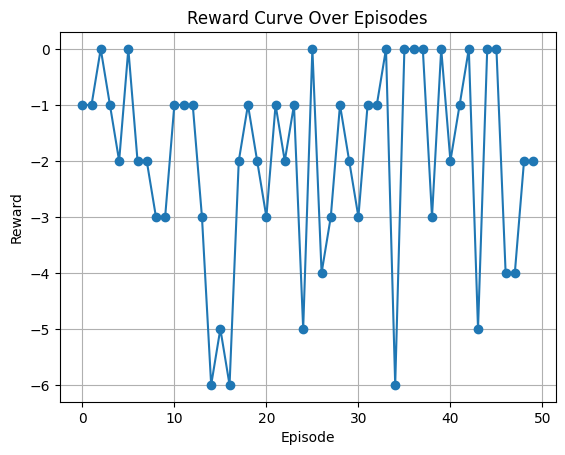

In [3]:
plt.plot(reward_history, marker='o')
plt.title("Reward Curve Over Episodes")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid()
plt.show()


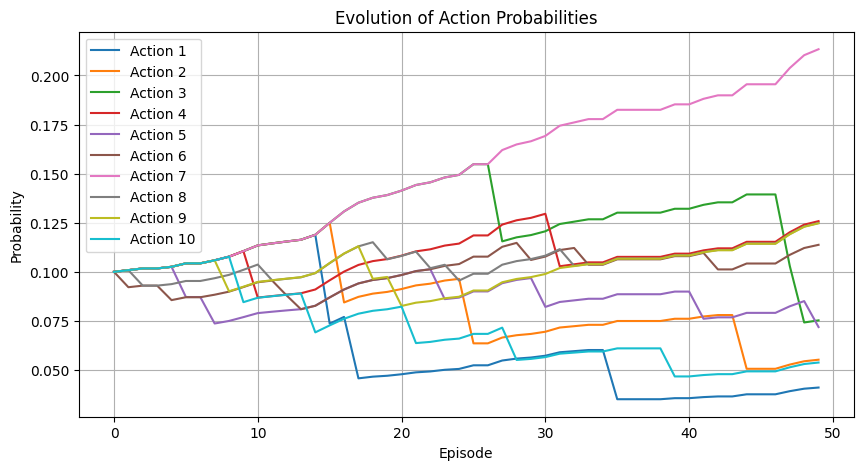

In [4]:
policy_history = np.array(policy_history)

plt.figure(figsize=(10,5))
for i in range(10):
    plt.plot(policy_history[:, i], label=f"Action {i+1}")

plt.legend()
plt.title("Evolution of Action Probabilities")
plt.xlabel("Episode")
plt.ylabel("Probability")
plt.grid()
plt.show()


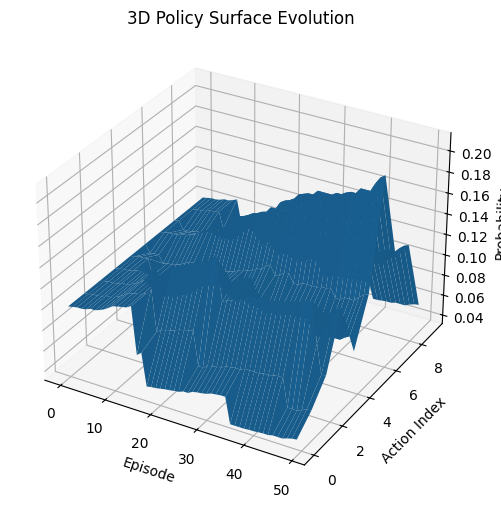

In [5]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

episodes = np.arange(policy_history.shape[0])
actions = np.arange(10)

E, A = np.meshgrid(episodes, actions)

ax.plot_surface(E, A, policy_history.T, linewidth=0)

ax.set_xlabel("Episode")
ax.set_ylabel("Action Index")
ax.set_zlabel("Probability")
ax.set_title("3D Policy Surface Evolution")

plt.show()


## Interpretation of Results

* Initially, probabilities were uniform.
* After updates, the policy started **increasing probability on the target action (7)**.
* The reward curve improved over time.

This illustrates how policy gradient learning works.

---

### How This Relates to Generative AI

In language models:

* "actions" = next token choice
* "state" = conversation context
* "reward" = human preference or alignment signal

RLHF optimizes:

$$
\max_\theta \mathbb{E} \left[ \sum r_t \right]
$$

to align responses with human values.

---

### Use Cases

✔ ChatGPT alignment  
✔ Image generation steering  
✔ Preference learning  
✔ Safety tuning


# ✔ Completed Coverage

### Theoretical Foundation
* MDP
* Policy gradient
* RLHF interpretation in generative AI

### Computation
* Policy update simulation

### Visualization
* Learning curve
* Probability evolution
* 3D policy surface

This completes *An Overview of Reinforcement Learning in Generative AI*.
